<a href="https://colab.research.google.com/github/Shogo-dayo/GNNpy/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !pip install torch==1.8.0

  Using cached https://files.pythonhosted.org/packages/94/99/5861239a6e1ffe66e120f114a4d67e96e5c4b17c1a785dfc6ca6769585fc/torch-1.8.0-cp37-cp37m-manylinux1_x86_64.whl
ERROR: torchvision 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.8.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.8.0 which is incompatible.
  Found existing installation: torch 1.8.1
    Uninstalling torch-1.8.1:
      Successfully uninstalled torch-1.8.1


# Import

geometric install error 対処法

* https://gist.github.com/ameya98/b193856171d11d37ada46458f60e73e7
* https://github.com/rusty1s/pytorch_geometric/issues/1876


In [3]:
# def format_pytorch_version(version):
#   return version.split('+')[0]
  
# TORCH_version = torch.__version__
# TORCH = format_pytorch_version(TORCH_version)

# def format_cuda_version(version):
#   return 'cu' + version.replace('.', '')

# CUDA_version = torch.version.cuda
# CUDA = format_cuda_version(CUDA_version)

使用するライブラリ

※ cudaおよびPytorchのバージョンによってインストールが異なるので注意

* [PyTorch geometric](https://pytorch-geometric.readthedocs.io/en/latest/)

In [35]:
# !pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.8.1.html
# !pip install -q torch-geometric 

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.1.html
ERROR: Could not find a version that satisfies the requirement torch-scatter==latest+cu101 (from versions: 0.3.0, 1.0.2, 1.0.3, 1.0.4, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.3.0, 1.3.1, 1.3.2, 1.4.0, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6)
ERROR: No matching distribution found for torch-scatter==latest+cu101


In [8]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric 

     |████████████████████████████████| 2.6MB 307kB/s 
     |████████████████████████████████| 1.5MB 311kB/s 


# Import

In [18]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("PyTorch ==", torch.__version__)
print("CUDA available", torch.cuda.is_available())
print("CUDA ==", torch.version.cuda)

PyTorch == 1.8.1+cu101
CUDA available True
CUDA == 10.1


In [3]:
## Imports for plotting
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
plt.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# # Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.cuda("cpu")
print(device)

cuda:0


In [62]:
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    # plt.savefig(f"epoch/{epoch}_graph.png")
    plt.show()

# Load Dataset

In [9]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [10]:
# !pip show torch_scatter

Name: torch-scatter
Version: 2.0.6
Summary: PyTorch Extension Library of Optimized Scatter Operations
Home-page: https://github.com/rusty1s/pytorch_scatter
Author: Matthias Fey
Author-email: matthias.fey@tu-dortmund.de
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


In [2]:
##<torch install バージョンが合わなかった時>
# !rm -rf "/usr/local/cuda"
# !rm -rf "/usr/local/cuda-10.0"
# !rm -rf "/usr/local/cuda-10.1"
# !rm -rf "/usr/local/cuda-11.0"
# !rm -rf '/usr/local/lib/python3.7/dist-packages/torch_scatter'
# !rm -rf "/usr/local/lib/python3.7/dist-packages/torch_scatter-2.0.6.dist-info"
# !rm -rf '/usr/local/lib/python3.7/dist-packages/torch_sparse'
# !rm -rf "/usr/local/lib/python3.7/dist-packages/torch_sparse-0.6.9.dist-info"
# !rm -rf "/usr/local/lib/python3.7/dist-packages/torchvision-0.9.1+cu101.dist-info"
# !rm -rf "/usr/local/lib/python3.7/dist-packages/torchvision"

In [11]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [12]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import os

In [22]:
os.getcwd()

'/content'

In [23]:
os.chdir('/content/drive/MyDrive/Study/MachineLearning/Other')

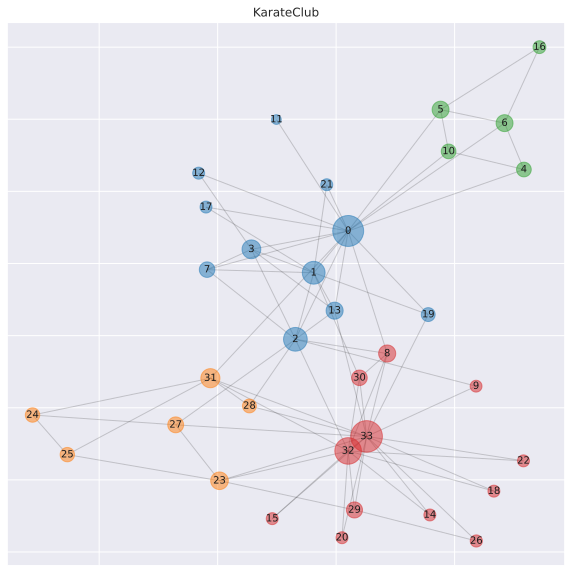

In [59]:
G = to_networkx(data, to_undirected=True)
 
# 可視化のためのページランク計算
pr = nx.pagerank(G)
pr_max = np.array(list(pr.values())).max()
 
# 可視化する際のノード位置
draw_pos = nx.spring_layout(G, seed=0) 
 
# ノードの色設定
cmap = plt.get_cmap('tab10')
labels = data.y.numpy()
colors = [cmap(l) for l in labels]
 
# 図のサイズ
plt.figure(figsize=(10, 10))
 
# 描画
nx.draw_networkx_nodes(G, 
                       draw_pos,
                       node_size=[v / pr_max * 1000 for v in pr.values()],
                       node_color=colors, alpha=0.5)
nx.draw_networkx_edges(G, draw_pos, arrowstyle='-', alpha=0.2)
nx.draw_networkx_labels(G, draw_pos, font_size=10)
 
plt.title('KarateClub')
plt.savefig("karateclub_graph.png")
plt.show()

# Build Model

In [36]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear

In [37]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [38]:
# モデルのインスタンス生成
model = GCN()
# print(model)
 
# モデルを訓練モードに設定
model.train()

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)

<IPython.core.display.Javascript object>

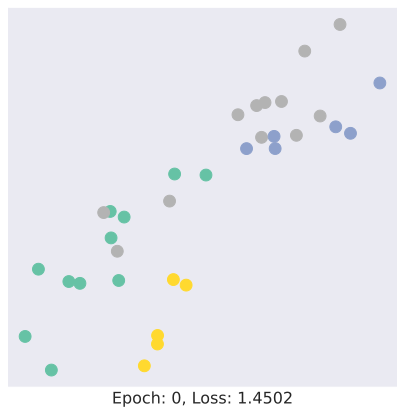

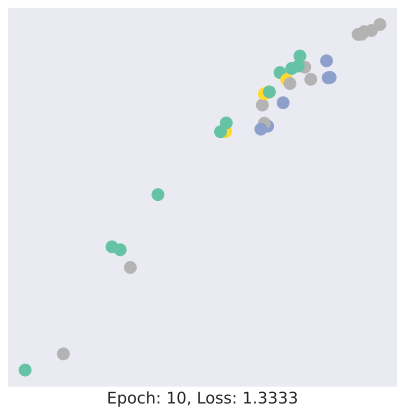

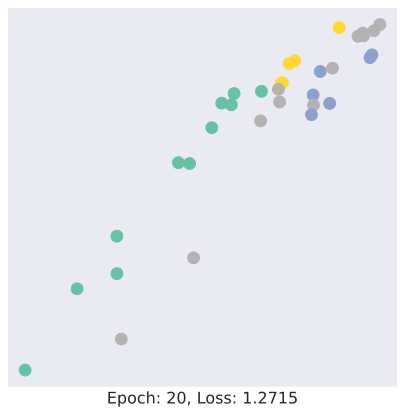

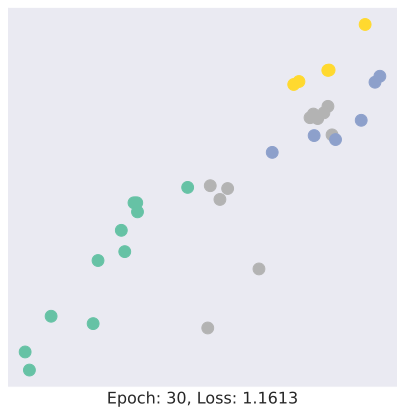

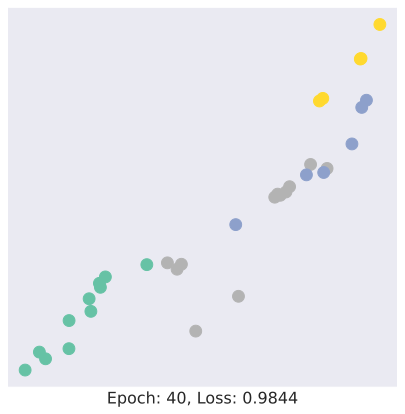

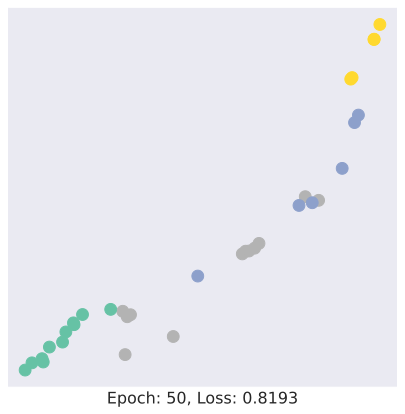

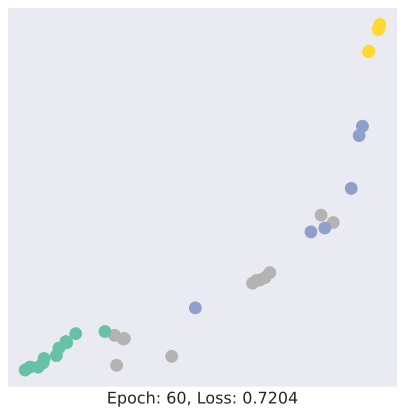

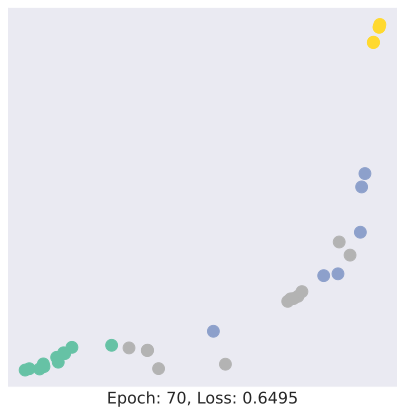

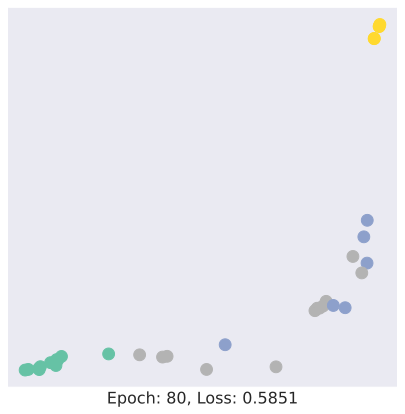

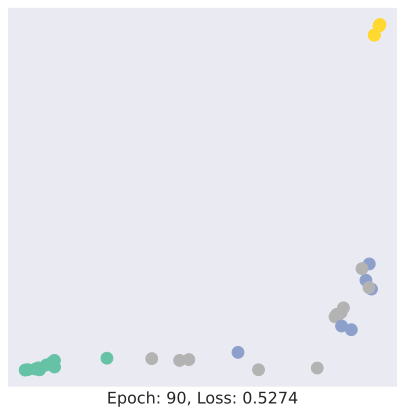

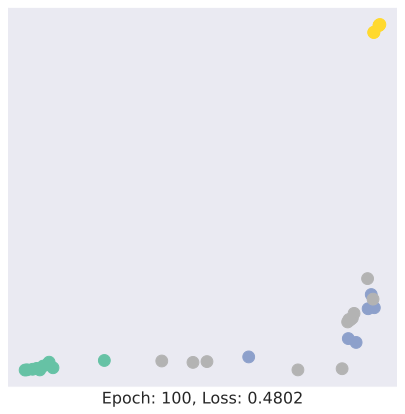

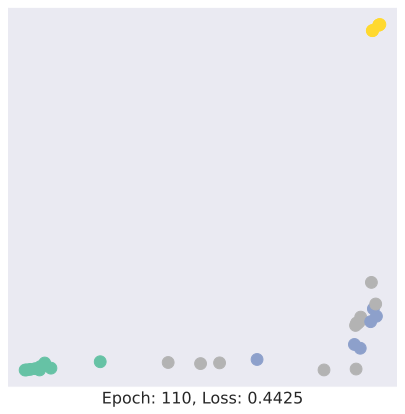

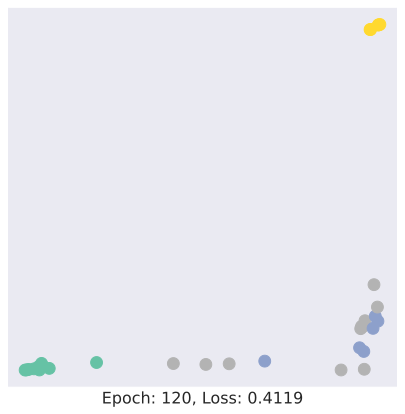

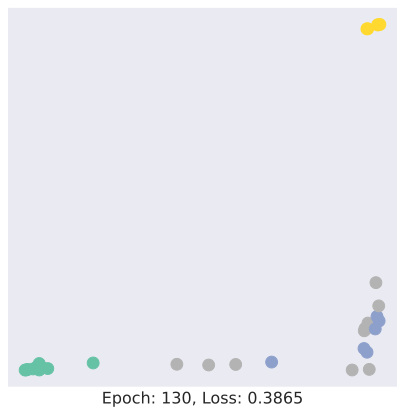

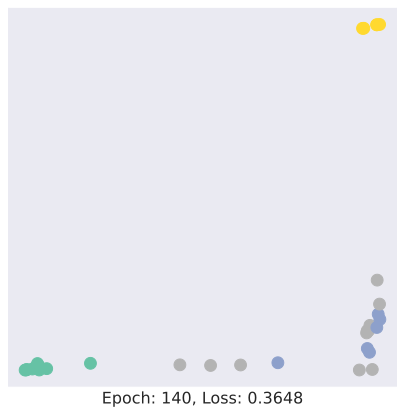

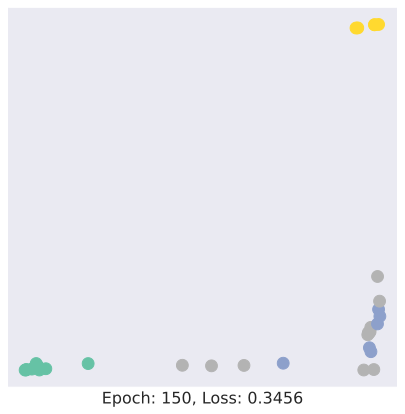

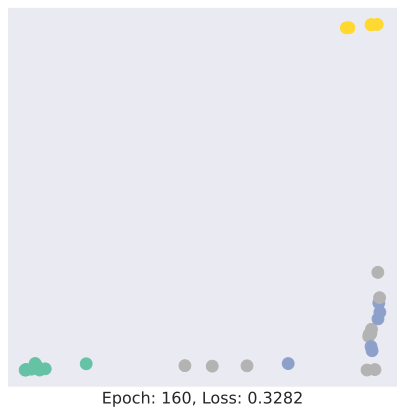

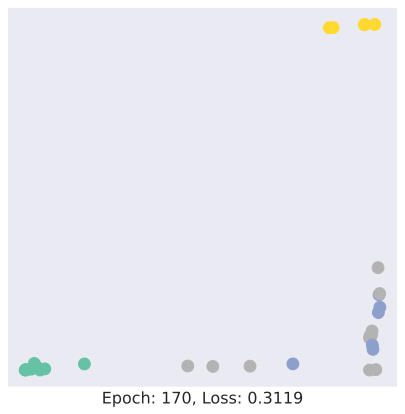

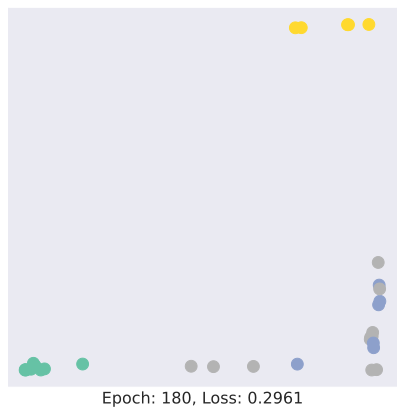

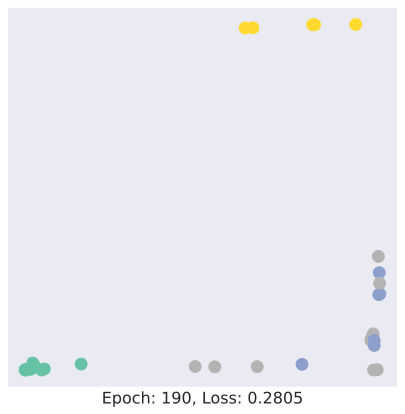

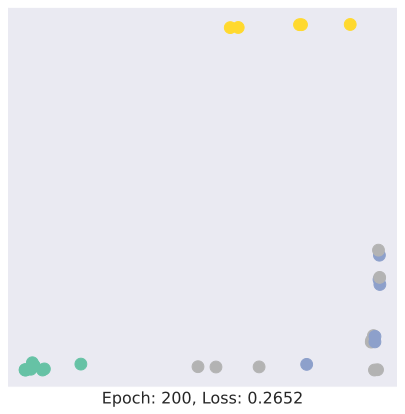

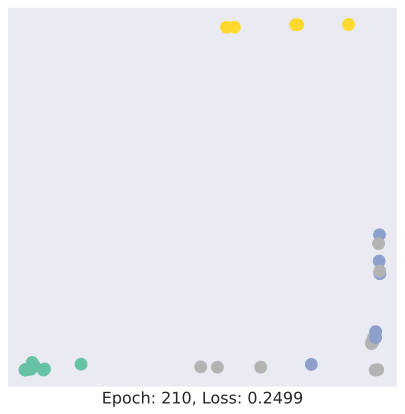

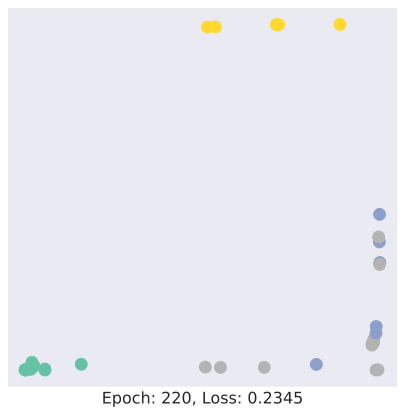

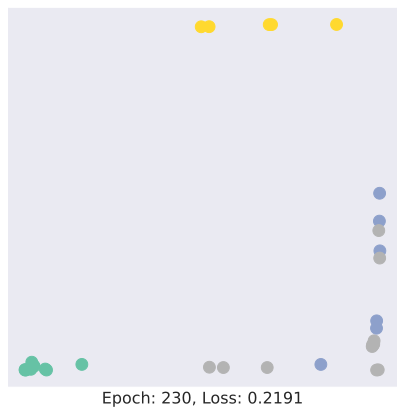

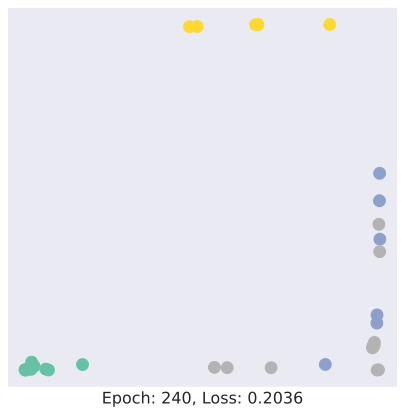

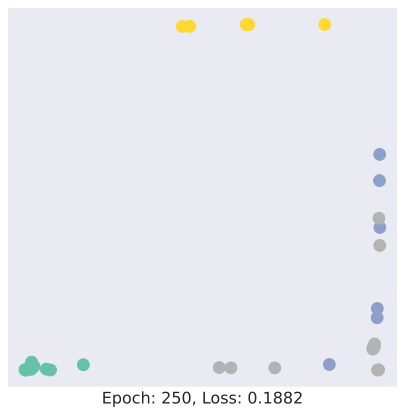

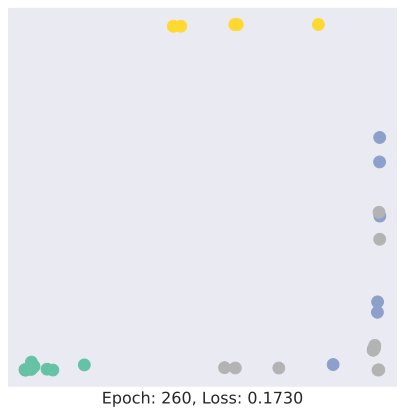

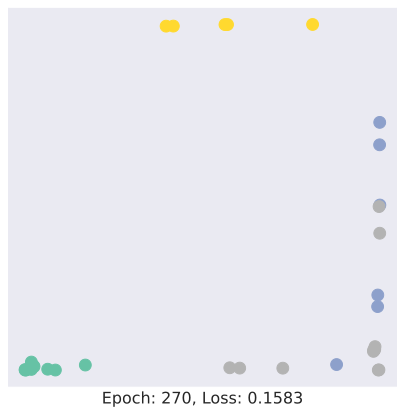

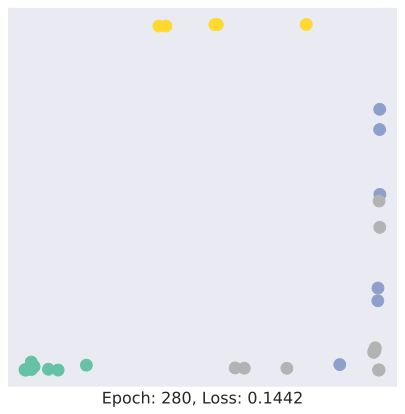

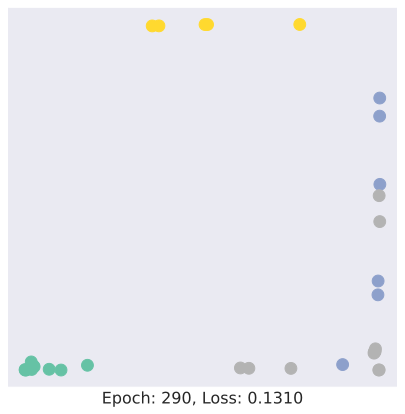

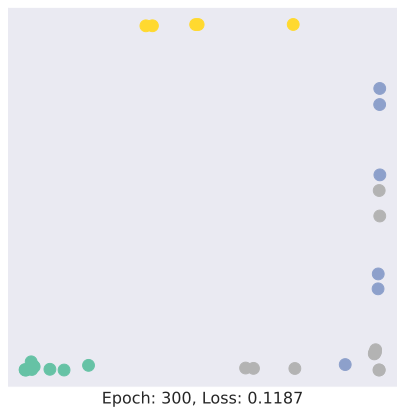

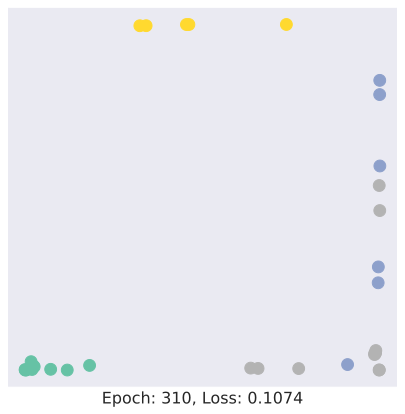

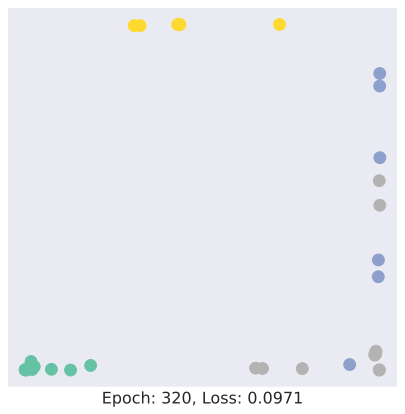

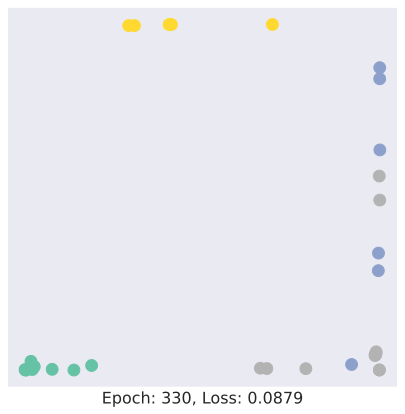

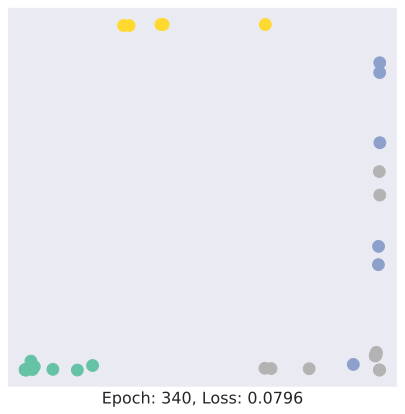

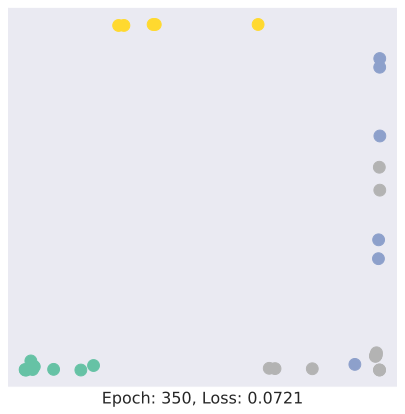

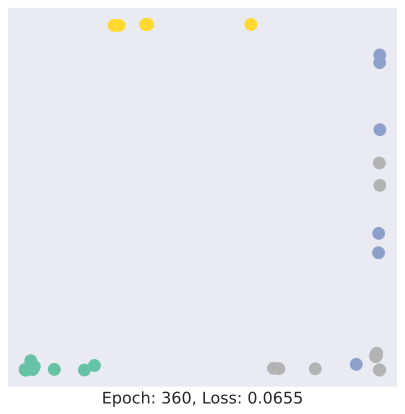

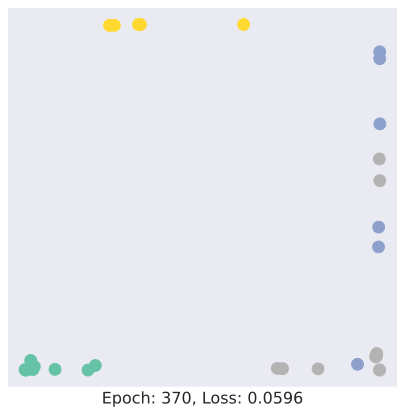

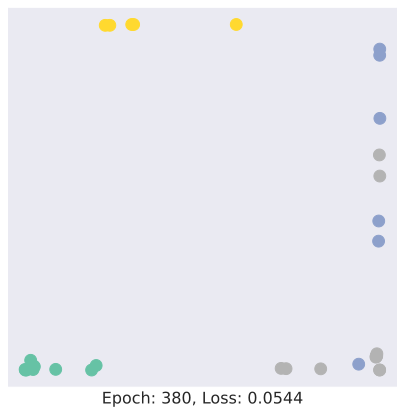

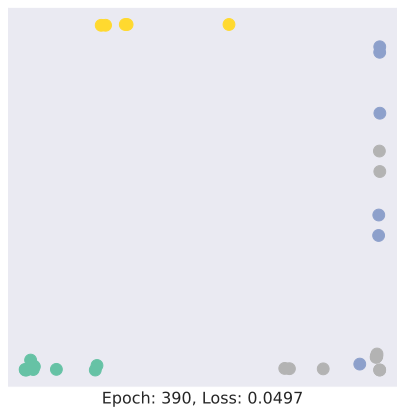

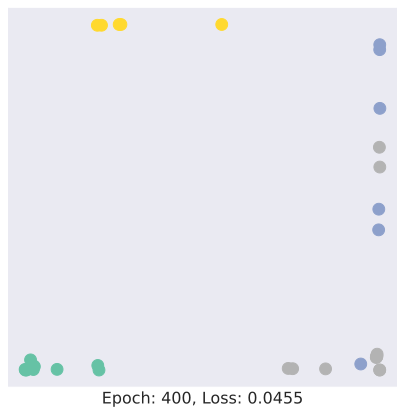

In [61]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.
history = {
        "epoch": [],
        "train_loss": [],
        "test_loss": [],
        "test_acc": []
    }

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    train_loss = 0.0
    loss, h = train(data)
    history["epoch"].append(epoch)
    history["train_loss"].append(loss.item())
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

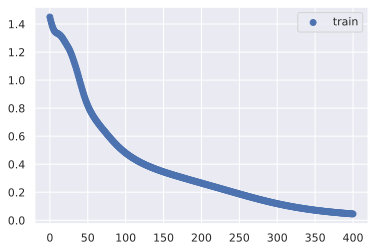

In [58]:
plt.scatter(history["epoch"], history["train_loss"], label="train")
plt.legend()